In [1]:
#Run this notebook in the root directory of the project
%cd ../../../

/data/main/2024/GridCellsCond


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import sim_utils as s_utils
import h5py
import seaborn as sns
import analysis_pred_utils as a_pred_utils
import analysis_utils as a_utils
import matplotlib.patches as patches
import matplotlib as mpl
%matplotlib inline

## Positional bias with and without HCN

In [20]:
"""
Load Data
"""
predictive_data={}
raw_data={}
sim_id = "VALD-PRED-INT-S-s-1a"
cell_to_analyse = 30
predictive_data[sim_id]={}
raw_data[sim_id]={}
params = s_utils.load_sim_params(sim_id)
stell_spks_l, intrnrn_spks_l = s_utils.load_spikes(sim_id)
true_pos = a_pred_utils.decode_pos_by_intrnrn(intrnrn_spks_l,params)
stell_decoded_pos= a_utils.decode_pos(stell_spks_l,params)
stell_syn_inhib_g = s_utils.load_data(sim_id,"stell_syn_inhib_g",cell_n=cell_to_analyse)
bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
raw_data[sim_id]["stell_spks"] = stell_spks_l
raw_data[sim_id]["intrnrn_spks"]=intrnrn_spks_l
raw_data[sim_id]["params"] =params
raw_data[sim_id]["true_pos"] =true_pos
raw_data[sim_id]["stell_syn_inhib_g"] =stell_syn_inhib_g
raw_data[sim_id]["stell_decoded_pos"] =stell_decoded_pos


sim_id = "VALD-PRED-INT-S-s-2a"
predictive_data[sim_id]={}
raw_data[sim_id]={}
params = s_utils.load_sim_params(sim_id)
stell_spks_l, intrnrn_spks_l = s_utils.load_spikes(sim_id)
true_pos = a_pred_utils.decode_pos_by_intrnrn(intrnrn_spks_l,params)
stell_decoded_pos= a_utils.decode_pos(stell_spks_l,params)
stell_syn_inhib_g = s_utils.load_data(sim_id,"stell_syn_inhib_g",cell_n=cell_to_analyse)

bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
raw_data[sim_id]["stell_spks"] = stell_spks_l
raw_data[sim_id]["intrnrn_spks"]=intrnrn_spks_l
raw_data[sim_id]["params"] =params
raw_data[sim_id]["true_pos"] =true_pos
raw_data[sim_id]["stell_syn_inhib_g"] =stell_syn_inhib_g
raw_data[sim_id]["stell_decoded_pos"] =stell_decoded_pos



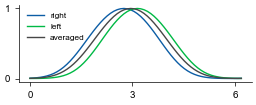

In [21]:
plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-PRED-INT-S-s-1a"
fig,axs = plt.subplots(1,1,figsize=(3,1))
win_size=6
cell_spks_r = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse])
cell_spks_l = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse+raw_data[sim_id]["params"]["N_per_sheet"]])
separate_fields_r = a_pred_utils.remove_uneven_fields(cell_spks_r,(params["allothetic_dur"],bounds[0]))
separate_fields_l = a_pred_utils.remove_uneven_fields(cell_spks_l,(bounds[0]+params["allothetic_dur"],bounds[1]))
field_pos_l = a_pred_utils.calculate_field_positions(separate_fields_l,raw_data[sim_id]["true_pos"])
field_pos_r = a_pred_utils.calculate_field_positions(separate_fields_r,raw_data[sim_id]["true_pos"])
convoled_l = a_pred_utils.convole_field_pos(field_pos_l,raw_data[sim_id]["params"],win_size=win_size)

convoled_l=np.mean(convoled_l,axis=0)
convoled_l=convoled_l
convoled_r = a_pred_utils.convole_field_pos(field_pos_r,raw_data[sim_id]["params"],win_size=win_size)
convoled_r=np.mean(convoled_r,axis=0)
convoled_r=convoled_r
pos = np.arange(0,raw_data[sim_id]["params"]["lambda0"],raw_data[sim_id]["params"]["lambda0"]/raw_data[sim_id]["params"]["n_phases"])
means = np.mean(np.row_stack((convoled_l,convoled_r)),axis=0)
axs.plot(pos,convoled_r/np.max(convoled_r),label="right",c="#0C5DA5")
axs.plot(pos,convoled_l/np.max(convoled_l),label="left",c="#00B945")
axs.plot(pos,means/np.max(means),label="averaged",c="#474747")
plt.legend(fontsize=6,loc="upper left")
plt.draw()
yticks = axs.get_yticks()
axs.set_yticks([yticks[1], yticks[-2]])
xticks = axs.get_xticks()
axs.set_xticks([xticks[1],xticks[int(len(xticks)/2)], xticks[-2]])
peak_l=pos[np.argmax(convoled_l)]
peak_r=pos[np.argmax(convoled_r)]
peak_mean=pos[np.argmax(means)]
plt.savefig(f"analysis/figures/Fig5/Fig5_A_left.svg")
plt.show()

In [22]:
sim_id = "VALD-PRED-INT-S-s-1a"
field_size = a_pred_utils.calc_field_size(raw_data[sim_id]["stell_spks"],raw_data[sim_id]["true_pos"],raw_data[sim_id]["params"],bounds)
bias = a_pred_utils.calc_bias_stell_intrnrn(raw_data[sim_id]["stell_decoded_pos"],raw_data[sim_id]["true_pos"],raw_data[sim_id]["params"],bounds)
print(bias*100/field_size)

10.942748775485093


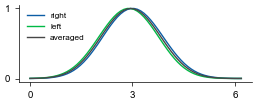

In [23]:
plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-PRED-INT-S-s-2a"
fig,axs = plt.subplots(1,1,figsize=(3,1))
win_size=7
cell_spks_r = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse])
cell_spks_l = np.array(raw_data[sim_id]["stell_spks"][cell_to_analyse+raw_data[sim_id]["params"]["N_per_sheet"]])
separate_fields_r = a_pred_utils.remove_uneven_fields(cell_spks_r,(params["allothetic_dur"],bounds[0]))
separate_fields_l = a_pred_utils.remove_uneven_fields(cell_spks_l,(bounds[0]+params["allothetic_dur"],bounds[1]))
field_pos_l = a_pred_utils.calculate_field_positions(separate_fields_l,raw_data[sim_id]["true_pos"])
field_pos_r = a_pred_utils.calculate_field_positions(separate_fields_r,raw_data[sim_id]["true_pos"])
convoled_l = a_pred_utils.convole_field_pos(field_pos_l,raw_data[sim_id]["params"],win_size=win_size)
convoled_l=np.mean(convoled_l,axis=0)
convoled_l=convoled_l
convoled_r = a_pred_utils.convole_field_pos(field_pos_r,raw_data[sim_id]["params"],win_size=win_size)
convoled_r=np.mean(convoled_r,axis=0)
convoled_r=convoled_r
pos = np.arange(0,raw_data[sim_id]["params"]["lambda0"],raw_data[sim_id]["params"]["lambda0"]/raw_data[sim_id]["params"]["n_phases"])
means = np.mean(np.row_stack((convoled_l,convoled_r)),axis=0)
axs.plot(pos,convoled_r/np.max(convoled_r),label="right",c="#0C5DA5")
axs.plot(pos,convoled_l/np.max(convoled_l),label="left",c="#00B945")
axs.plot(pos,means/np.max(means),label="averaged",c="#474747")
plt.legend(fontsize=6,loc="upper left")
plt.draw()
yticks = axs.get_yticks()
axs.set_yticks([yticks[1], yticks[-2]])
xticks = axs.get_xticks()
axs.set_xticks([xticks[1],xticks[int(len(xticks)/2)], xticks[-2]])
peak_l=pos[np.argmax(convoled_l)]
peak_r=pos[np.argmax(convoled_r)]
peak_mean=pos[np.argmax(means)]
plt.savefig(f"analysis/figures/Fig5/Fig5_A_right.svg")
plt.show()



In [7]:
sim_id = "VALD-PRED-INT-S-s-2a"
field_size = a_pred_utils.calc_field_size(raw_data[sim_id]["stell_spks"],raw_data[sim_id]["true_pos"],raw_data[sim_id]["params"],bounds)
bias = a_pred_utils.calc_bias_stell_intrnrn(raw_data[sim_id]["stell_decoded_pos"],raw_data[sim_id]["true_pos"],raw_data[sim_id]["params"],bounds)
bias = a_pred_utils.calc_bias_stell_intrnrn(raw_data[sim_id]["stell_decoded_pos"],raw_data[sim_id]["true_pos"],raw_data[sim_id]["params"],bounds)
print(bias*100/field_size)

-5.736581902719549


# Inhibitory synaptic Trace

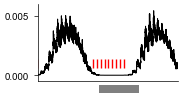

In [12]:
%matplotlib inline
plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-PRED-INT-S-s-1a"
x = np.arange(0,raw_data[f"{sim_id}"]["params"]["sim_dur"],raw_data[f"{sim_id}"]["params"]["recorder_dt"])
fig,axs = plt.subplots(1,1,figsize=(3-0.174-1.019,1))
axs.plot(x,raw_data[f"{sim_id}"]["stell_syn_inhib_g"],c="black",linewidth=0.75)
axs.eventplot(raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse],linelengths=0.0008,lineoffsets=0.001,color="red")
axs.set_ylim([-0.0005,0.006])
axs.set_xlim([15450,19000])
rect = patches.Rectangle((17000, -0.0015), 1000, 0.0007, edgecolor='none', facecolor='grey',clip_on=False)
axs.add_patch(rect)
plt.draw()
yticks = axs.get_yticks()
axs.set_yticks([yticks[1], yticks[-2]])
axs.set_xticks([])
plt.savefig(f"analysis/figures/Fig5/Fig5_B_left.svg")


In [13]:
sim_id = "VALD-PRED-INT-S-s-1a"
fspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][69].astype("int") #round to recorer dt
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
first_spike_inhib_hcn=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(fspk/recorder_dt)]
print(fspk)
print(f"{first_spike_inhib_hcn:.2e}")

sim_id = "VALD-PRED-INT-S-s-1a"
lspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][77].astype("int")
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
last_spike_inhib_hcn=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(lspk/recorder_dt)]
print(lspk)
print(f"{last_spike_inhib_hcn:.2e}")



16844
1.29e-04
17626
2.27e-06


In [16]:
%matplotlib qt

plt.style.use("analysis/config/paper.mplstyle")
sim_id = "VALD-PRED-INT-S-s-2a"
x = np.arange(0,raw_data[f"{sim_id}"]["params"]["sim_dur"],raw_data[f"{sim_id}"]["params"]["recorder_dt"])
fig,axs = plt.subplots(1,1,figsize=(3-0.174-1.019,1))
axs.plot(x,raw_data[f"{sim_id}"]["stell_syn_inhib_g"],c="black",linewidth=0.75)
axs.eventplot(raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse],linelengths=0.0008,lineoffsets=0.001,color="red")
rect = patches.Rectangle((17000, -0.0015), 1000, 0.0007, edgecolor='none', facecolor='grey',clip_on=False)
axs.add_patch(rect)
plt.draw()
yticks = axs.get_yticks()
axs.set_yticks([yticks[1], yticks[-2]])
axs.set_xticks([])
axs.set_xlim([15700,19300])
axs.set_ylim([-0.0005,0.006])
plt.savefig(f"analysis/figures/Fig5/Fig5_B_right.svg")




In [15]:
sim_id = "VALD-PRED-INT-S-s-2a"
fspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][50].astype("int") #round to recorer dt
print(fspk)
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
first_spike_inhib_hcn_ko=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(fspk/recorder_dt)]
print(f"{first_spike_inhib_hcn_ko:.2e}")

sim_id = "VALD-PRED-INT-S-s-2a"
lspk = raw_data[f"{sim_id}"]["stell_spks"][cell_to_analyse][55].astype("int")
print(lspk)
recorder_dt = raw_data[f"{sim_id}"]["params"]["recorder_dt"]
last_spike_inhib_hcn_ko=raw_data[f"{sim_id}"]["stell_syn_inhib_g"][int(lspk/recorder_dt)]
print(f"{last_spike_inhib_hcn_ko:.2e}")



17140
3.02e-07
17675
8.55e-06


## gh vs inhib syn at first vs last spikes

In [24]:
"""
Load Data
"""
import csv
sim_id = "VALD-PRED-INT-S-m-1a"
params = s_utils.load_sim_params(sim_id)["0"]
fspk_inhib = []
lspk_inhib = []
gh_range_arr = np.linspace(0,0.002,21)
n_trials=1
sim_num = 0
for gh in gh_range_arr:
    for tr in range(n_trials):
        print(sim_num,end=" ")
        stell_spks_l,_= s_utils.load_spikes(sim_id,sim_num=sim_num)
        inhib_g = s_utils.load_full_data(sim_id,data_id="stell_syn_inhib_g",sim_num=sim_num)
        fspk,lspk = a_pred_utils.calc_inhib_g_at_first_and_last_spike(stell_spks_l[:params["N_per_sheet"]],inhib_g)
        fspk_inhib.append(fspk)
        lspk_inhib.append(lspk)
        sim_num+=1


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [25]:
def sci_notation(num, pos,decimal_digits=1, precision=None, exponent=None):
    print(num.shape)
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = np.floor(np.log10(np.abs(num))).astype("int")
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

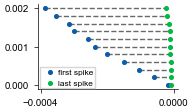

In [26]:
plt.style.use("analysis/config/paper.mplstyle")
plt.rcParams["legend.frameon"]=True
plt.rcParams["legend.fancybox"]=False

fig ,ax = plt.subplots(1,1,figsize=(1.8,1.1))
for i,gh in enumerate(gh_range_arr):
    if i%2==0:
        fspk = -np.mean(fspk_inhib[i])
        lspk = -np.mean(lspk_inhib[i])
        if i==len(gh_range_arr)-1:
            ax.scatter([fspk,],[gh,],c=list(plt.rcParams["axes.prop_cycle"])[0]["color"],marker="o",s=7,zorder=100,label="first spike")
            ax.scatter([lspk,],[gh,],c=list(plt.rcParams["axes.prop_cycle"])[1]["color"],marker="o",s=7,zorder=100,label="last spike")
        else:

            ax.scatter([fspk,],[gh,],c=list(plt.rcParams["axes.prop_cycle"])[0]["color"],marker="o",s=7,zorder=100)
            ax.scatter([lspk,],[gh,],c=list(plt.rcParams["axes.prop_cycle"])[1]["color"],marker="o",s=7,zorder=100)

        ax.hlines(gh,fspk,lspk,color="dimgray",linestyles="--")

plt.legend(loc="lower left",fontsize=6,handletextpad=0.05,borderaxespad=0.15,borderpad=0.2).set_zorder(200)
# ax.set_xticklabels(["-0.0003","$-0.0003$","$0$"])
plt.draw()

xticks = ax.get_xticks()
ax.set_xticks([xticks[1], xticks[-2]])
plt.savefig(f"analysis/figures/Fig5/Fig5_D.svg")


## HCN Time scales

In [15]:
sim_id = "DEBUG-PRED-INT-S-m-2d"
params = s_utils.load_sim_params(sim_id)["0"]
sim_dur = params["sim_dur"]
bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
fast_tau_arr = np.linspace(0.51,2.5,10)
slow_tau_arr = np.linspace(5.6,53.1,10)
bias_field_percent = np.full((int(fast_tau_arr.shape[0]),int(slow_tau_arr.shape[0])),np.nan)
n_trials = 1
sim_num = 0
with h5py.File(f"data/{sim_id}/{sim_id}-pred_code_field.hdf5","r") as f:
    for i,tau_s in enumerate(slow_tau_arr):
        for j,tau_f in enumerate(fast_tau_arr):
            for tr in range(n_trials):
                bias_field_percent[i,j]=np.array(f[f"{sim_num}"])[0]

                sim_num+=1

In [16]:
x = np.linspace(-100,60,1000)
slow_tau_max = np.zeros_like(slow_tau_arr)
fast_tau_max = np.zeros_like(fast_tau_arr)
for i in range(slow_tau_arr.shape[0]):
    fast_tau_max[i]=(np.max(((fast_tau_arr[i]/((np.exp((x-1.7)/10))+np.exp(-(x+340)/52)))+1)))
    slow_tau_max[i]=(np.max(((slow_tau_arr[i]/((np.exp((x-1.7)/14))+np.exp(-(x+260)/43)))+1)))

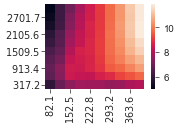

In [17]:
sns.set_theme(style="white")
plt.style.use("analysis/config/paper.mplstyle")
fig=plt.figure(figsize=(1.6,1.1))
ax=sns.heatmap(bias_field_percent,cmap="rocket")
xticklabels=[]
for lab in ax.get_xticklabels():
    xticklabels.append("$"+str(round(fast_tau_max[int(lab.get_text())],1))+"$")
yticklabels=[]
for lab in ax.get_yticklabels():
    yticklabels.append("$"+str(round(slow_tau_max[int(lab.get_text())],1))+"$")
ax.set_xticklabels(xticklabels,rotation="vertical")
ax.set_yticklabels(yticklabels,rotation="horizontal")
ax.tick_params(which="both",direction="out",pad=0.5)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.invert_yaxis()
ax.minorticks_off()
plt.savefig(f"analysis/figures/Fig5/Fig5_E.svg")

## Bias at different speeds

In [18]:
"""
Load Data
"""

sim_id = "VALD-PRED-INT-S-m-3a"
params = s_utils.load_sim_params(sim_id)["0"]
sim_dur = float(80000)
dc_range_arr = np.linspace(-2.7e-3,1e-2,500,endpoint=False)
gh_range_arr = np.linspace(0,0.0015,16)
n_trials = 1
sim_num = 0

predictive_data= np.full((gh_range_arr.shape[0],dc_range_arr.shape[0]),np.nan)

for i,gh in enumerate(gh_range_arr):
    for j,dc in enumerate(dc_range_arr):
        for tr in range(n_trials):
            with h5py.File(f"data/{sim_id}/{sim_id}-pred_code_field.hdf5","r") as f:
                predictive_data[i,j]=f[f"{sim_num}"][0]
                sim_num+=1

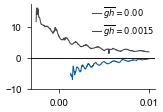

In [19]:
mpl.rcdefaults()
plt.style.use("analysis/config/paper.mplstyle")
fig,ax = plt.subplots(1,1,figsize=(1.6,1.1))
ax.plot(dc_range_arr[:],predictive_data[0][:],label="$\\overline{gh}=0.00$",linewidth=0.75)
ax.plot(dc_range_arr[:],predictive_data[15][:],label="$\\overline{gh}=0.0015$",linewidth=0.75,c="#474747")
ax.axhline(0,color="k",linewidth=0.75)
ax.legend(loc="upper right",fontsize=6,borderpad=0,borderaxespad=0,handlelength=1,labelspacing=0.2,handletextpad=0.3)
plt.draw()

xticks = ax.get_xticks()
ax.set_xticks([xticks[1], xticks[-2]])
yticks = ax.get_yticks()
ax.set_yticks([yticks[0],yticks[1],yticks[-2]])
plt.savefig(f"analysis/figures/Fig5/Fig5_F.svg")

## HCN density

In [20]:
"""
Load Data
"""

sim_id = "VALD-PRED-INT-S-m-3a"
params = s_utils.load_sim_params(sim_id)["0"]
sim_dur = float(80000)
dc_range_arr = np.linspace(-2.7e-3,1e-2,500,endpoint=False)
gh_range_arr = np.linspace(0,0.0015,16)
n_trials = 1
sim_num= 0

slopes= np.full((gh_range_arr.shape[0],dc_range_arr.shape[0]),np.nan)
for i,gh in enumerate(gh_range_arr):
    for j,dc in enumerate(dc_range_arr):
        for tr in range(n_trials):
            with h5py.File(f"data/{sim_id}/{sim_id}-slopes.hdf5","r") as f:
                slopes[i,j]=f[f"{sim_num}"][0]
                sim_num+=1

In [21]:
start_idx = {0:156,
             1:142,
             2:131,
             3:123,
             4:109,
             5:99,
             6:90,
             7:77,
             8:66,
             9:56,
             10:49,
             11:38,
             12:30,
             13:20,
             14:9,
             15:2}
xnew =2
dc_const = np.full_like(gh_range_arr,np.nan)
for i,gh in enumerate(gh_range_arr):
    dc_const[i]=np.interp(xnew,slopes[i,start_idx[i]:],dc_range_arr[start_idx[i]:])
    sim_num+=1
dc_const

array([ 1.28031834e-03,  1.04879480e-03,  8.16224066e-04,  5.64521873e-04,
        3.11440625e-04,  5.91552781e-05, -2.10812800e-04, -4.46674041e-04,
       -6.97370230e-04, -9.49550210e-04, -1.17218007e-03, -1.41407774e-03,
       -1.64949788e-03, -1.87639332e-03, -2.09076233e-03, -2.30484610e-03])

In [22]:
sim_id="VALD-PRED-INT-S-m-4a"
params = s_utils.load_sim_params(sim_id)["0"]
sim_dur = float(80000)
gh_range_arr = np.linspace(0,0.0015,16)
dc_range_arr=np.array([ 1.28031834e-03,  1.04879480e-03,  8.16224066e-04,  5.64521873e-04,
        3.11440625e-04,  5.91552781e-05, -2.10812800e-04, -4.46674041e-04,
       -6.97370230e-04, -9.49550210e-04, -1.17218007e-03, -1.41407774e-03,
       -1.64949788e-03, -1.87639332e-03, -2.09076233e-03, -2.30484610e-03])
n_trials = 1
sim_num = 0
bounds = (params["extra_params"]["dir_change_t"],int(params["sim_dur"]))
pred_bias=np.full((gh_range_arr.shape[0],n_trials),np.nan)
for i,gh in enumerate(gh_range_arr):
    for tr in range(n_trials):
        with h5py.File(f"data/{sim_id}/{sim_id}-pred_code_field.hdf5","r") as f:
            pred_bias[i,tr]=f[f"{sim_num}"][0]  
        sim_num+=1

/tmp/ipykernel_2628528/3947308012.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["",labs[0],labs[5],labs[10],labs[-1]], rotation=0)


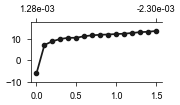

In [36]:
%matplotlib inline
plt.style.use("analysis/config/paper.mplstyle")
plt.rcParams["xtick.labelsize"] = 6.5
plt.rcParams["ytick.labelsize"] = 7
fig,ax = plt.subplots(1,1,figsize=(1.693,0.774))
# plt.rcParams["xtick.minor.visible"] = True
plt.plot(np.arange(len(gh_range_arr))[:],pred_bias.mean(1)[:],linewidth=1.25,marker="o",markersize=3,c="k")
labs = (gh_range_arr*1000).round(2)
labs2 = (dc_range_arr).round(5)
ax.set_ylim([ax.get_ylim()[0]-3,ax.get_ylim()[1]+3])

# ax.set_xticks([xticks[1],xticks[2], xticks[-2]])
# ax.set_xticklabels([-5,labs[0],labs[5],labs[10],"",20], rotation=0)
secax = ax.secondary_xaxis('top')
# xticks=secax.get_xticks()
plt.draw()
# ax.set_xticks([ax.get_xticks()[1],ax.get_xticks()[-2]])

secax.set_xticks([ax.get_xticks()[1],ax.get_xticks()[-2]])
ax.set_xticklabels(["",labs[0],labs[5],labs[10],labs[-1]], rotation=0)
secax.set_xticklabels([f"{labs2[0]:.2e}",f"{labs2[-1]:.2e}"], rotation=0)

plt.savefig(f"analysis/figures/Fig5/Fig5_C.svg")